In [1]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from sklearn.manifold import TSNE
# for visualizaion of data with high number of dimension

In [4]:
#df.to_csv('NYC_taxi_clean.csv')
df=pd.read_csv('NYC_taxi_clean.csv')

In [167]:
df.ride_duration_seconds.max()

7191.0

In [168]:
df.ride_duration_seconds.min()

1.0

In [171]:
df.ride_duration_seconds.median()
#11min

663.0

In [170]:
df.ride_duration_seconds.value_counts()
#6min

368.0     1621
348.0     1579
367.0     1576
358.0     1574
408.0     1574
          ... 
5406.0       1
6620.0       1
5412.0       1
4513.0       1
5193.0       1
Name: ride_duration_seconds, Length: 5916, dtype: int64

In [ ]:
to_select=['vendor_id','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','month', 'week_nb', 'weekday', 'day_nb',
       'hour', 'new_passenger_count', 'precipitation_mm',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C',
       'ride_duration_seconds', 'distance_KM', 'working_days']

In [111]:
df_ml2=df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','month',
       'hour', 'new_passenger_count', 'precipitation_mm','weekday',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C','working_days','Month_day']]



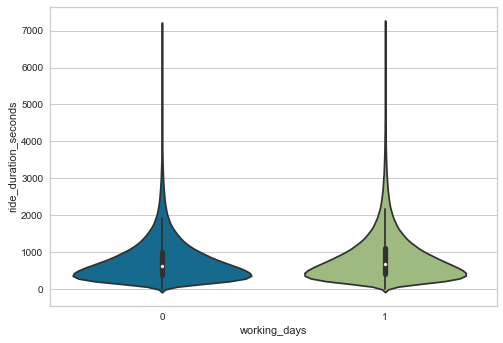

<AxesSubplot:xlabel='weekday', ylabel='ride_duration_seconds'>

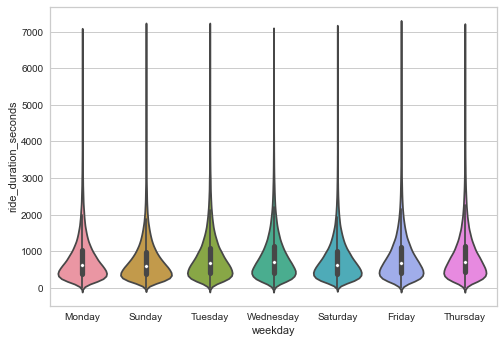

In [108]:
sns.violinplot(x = df_ml2.working_days, y = df.ride_duration_seconds, data = df_ml2)
plt.show()
sns.violinplot(x = df_ml2.weekday, y = df.ride_duration_seconds, data = df_ml2)

In [115]:
df_ml3=df[['vendor_id','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','month',
       'hour', 'new_passenger_count', 'precipitation_mm','weekday',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C','working_days','Month_day','distance_KM']]

<AxesSubplot:xlabel='precipitation_mm', ylabel='ride_duration_seconds'>

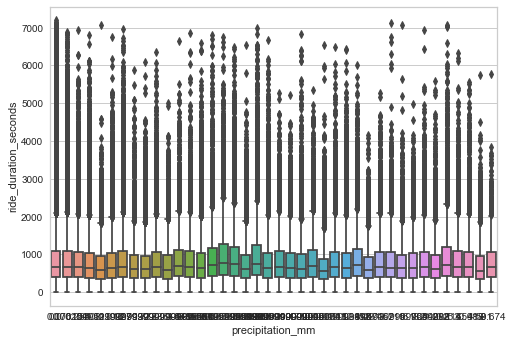

In [154]:
sns.boxplot(df_ml3.precipitation_mm,df.ride_duration_seconds)


In [112]:
df_ml2=pd.get_dummies(data=df_ml2, columns=['hour','month','weekday'],drop_first=True)

In [113]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_ml2)

In [116]:
X=df_ml3.drop(['hour','new_passenger_count','distance_KM','weekday'],axis=1)

In [117]:
X.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,precipitation_mm,snow_fall_mm,snow_depth_mm,average temperature_C,working_days,Month_day
0,2,-73.982155,40.767937,-73.964630,40.765602,March,7.366,0.0,0.000000,7.500000,1,14
1,1,-73.980415,40.738564,-73.999481,40.731152,June,8.890,0.0,0.000000,5.277778,0,12
2,2,-73.979027,40.763939,-74.005333,40.710087,January,0.000,0.0,0.000254,-5.555556,1,19
3,2,-74.010040,40.719971,-74.012268,40.706718,April,10.160,0.0,0.000000,23.611111,1,6
4,2,-73.973053,40.793209,-73.972923,40.782520,March,0.000,0.0,0.000000,8.055556,0,26


In [118]:
X=pd.get_dummies(data=X, columns=['month'],drop_first=True)

In [119]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler1 = MinMaxScaler()
# transform data
scaled1 = scaler1.fit_transform(X)

###  Find  optimum number of cluster with K-Elbow method

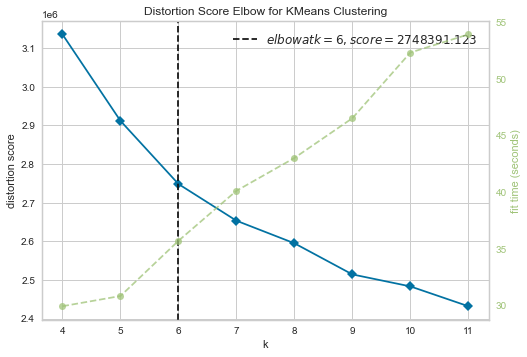

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

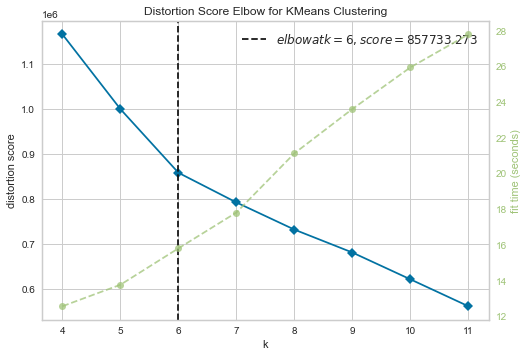

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:

# Instantiate the clustering model and visualizer
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(4,12))

visualizer.fit(scaled1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# PCA

In [ ]:
#Apply PCA before Kmean ( should optimize  the output (empirical observations) )

In [122]:
# define PCA toget 85% of explained variance, fit the PCA model and check the number of components; Here 23
pca=PCA(0.85)
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.12435527, 0.06447294, 0.06270994, 0.06074972, 0.05870824,
       0.0535061 , 0.05144554, 0.05062883, 0.04745935, 0.03075604,
       0.02500185, 0.02248333, 0.02200923, 0.02091192, 0.02046397,
       0.01964513, 0.01883146, 0.01830376, 0.01784664, 0.01778813,
       0.01747446, 0.01715302, 0.01688044])

In [123]:
#apply pCA transformation 
pca_df=pd.DataFrame(pca.transform(scaled), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23'])

In [124]:
# define PCA toget 85% of explained variance, fit the PCA model and check the number of components; Here 23
pca1=PCA(0.85)
pca1.fit(scaled1)
pca1.explained_variance_ratio_

array([0.19230754, 0.15826853, 0.13730481, 0.13272672, 0.12776731,
       0.12488385])

In [125]:
#apply pCA transformation 
pca_df1=pd.DataFrame(pca1.transform(scaled1), columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

# Calcul Y predict

In [126]:
#model1 Kmeans applied to data transformed with PCA
kmeans1=KMeans(6)
kmeans1=kmeans1.fit(pca_df)
kmeans1.cluster_centers_
# Attribution of class to each record (prediction
df_ml2['cluster1']=kmeans1.predict(pca_df)

In [127]:
df_ml2.cluster1.value_counts(normalize=True)

5    0.356053
3    0.151389
2    0.133886
4    0.129087
1    0.118353
0    0.111231
Name: cluster1, dtype: float64

In [ ]:
#df_ml2Sample=df_ml2.sample(frac=0.001)

In [ ]:
sns.scatterplot(x='PC1',y='PC2', data=pca_df, hue=df_ml2['cluster1'])

In [ ]:
# plot relationship between columns to see how they influence clusters
sns.scatterplot(df_ml2Sample.pickup_latitude ,df_ml2Sample.pickup_longitude  ,hue=df_ml2Sample.cluster1)

##### with class for insignificant columns

In [128]:
#model1 Kmeans applied to data transformed with PCA
kmeans2=KMeans(6)
kmeans2=kmeans2.fit(pca_df1)
kmeans2.cluster_centers_
# Attribution of class to each record (prediction


array([[ 0.01596182, -0.11179023,  0.45375035,  0.07301792,  0.78035086,
         0.00342754],
       [-0.00921044,  0.04904424, -0.34698896, -0.53009057, -0.00861715,
        -0.64340057],
       [-0.00304311, -0.09862976, -0.43967985,  0.75159236, -0.0962295 ,
        -0.07169244],
       [ 0.53762093,  0.04752732,  0.31939329,  0.0034062 , -0.29771983,
        -0.00786078],
       [-0.01721006,  0.08552666, -0.32634589, -0.37640858, -0.0350047 ,
         0.76624007],
       [-0.46212534,  0.03380897,  0.33551209,  0.00866972, -0.29442158,
        -0.01212182]])

In [129]:
df_ml3['cluster']=kmeans2.predict(pca_df1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_ml3.cluster.value_counts(normalize=True)

5    0.182208
2    0.175668
1    0.163400
3    0.160688
0    0.160582
4    0.157453
Name: cluster, dtype: float64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

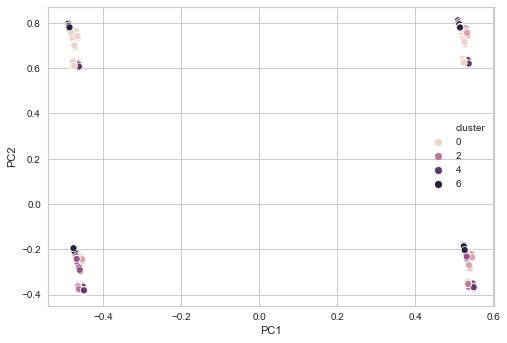

In [77]:
sns.scatterplot(x='PC1',y='PC2', data=pca_df1, hue=df_ml3['cluster'])

In [131]:
df_ml3.to_csv('df_ml3.csv')
df_ml2.to_csv('df_ml2.csv')

In [132]:
#model librairies
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import RepeatedStratifiedKFold

#import statsmodels.api as sm
#from statsmodels.genmod.families.links import log
from sklearn.linear_model import TweedieRegressor


In [42]:
df_ml2.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'new_passenger_count', 'precipitation_mm',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C',
       'working_days', 'Month_day', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_February', 'month_January', 'month_June', 'month_March',
       'month_May', 'cluster1'],
      dtype='object')

In [78]:
df_ml3.columns

Index(['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'month', 'hour', 'new_passenger_count',
       'precipitation_mm', 'snow_fall_mm', 'snow_depth_mm',
       'average temperature_C', 'working_days', 'Month_day', 'distance_KM',
       'cluster'],
      dtype='object')

In [133]:
X=df_ml3.drop(['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'month',
       'precipitation_mm', 'snow_fall_mm', 'snow_depth_mm',
       'average temperature_C', 'working_days', 'Month_day'],axis=1)

In [134]:
X.head()

,hour,new_passenger_count,weekday,distance_KM,cluster
0,17,1.0,Monday,1.498521,2
1,0,1.0,Sunday,1.805507,0
2,11,1.0,Tuesday,6.385098,4
3,19,1.0,Wednesday,1.485498,5
4,13,1.0,Saturday,1.188588,2


In [135]:
X=pd.get_dummies(data=X, columns=['weekday','cluster'],drop_first=True)

In [138]:
X.shape

(1450443, 14)

In [136]:
Y=df.ride_duration_seconds

In [137]:
Y.shape

(1450443,)

In [139]:
# splitting  dataset into train and test 1
X_train, X_test,y_train,y_test = train_test_split(scaled, \
                                                  df.ride_duration_seconds, \
                                                  test_size=1/3, \
                                                  random_state=42)

In [140]:
# splitting  dataset into train and test 2
X1_train, X1_test,y1_train,y1_test = train_test_split(X, \
                                                  Y, \
                                                  test_size=1/3, \
                                                  random_state=42)



In [141]:
X1_train

,hour,new_passenger_count,distance_KM,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
561192,8,2.0,0.948432,1,0,0,0,0,0,1,0,0,0,0
398074,11,1.0,0.929590,0,0,0,1,0,0,0,0,0,1,0
1290032,0,1.0,3.116450,0,0,1,0,0,0,0,1,0,0,0
671963,10,3.0,0.729924,0,0,0,0,0,1,0,0,0,0,0
845324,16,2.0,9.091177,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,18,1.0,2.230714,1,0,0,0,0,0,0,0,0,1,0
1414414,20,2.0,3.025477,0,0,0,1,0,0,0,1,0,0,0
131932,20,1.0,3.473278,0,0,0,0,0,0,0,0,0,0,0
671155,8,1.0,1.653215,0,0,0,1,0,0,0,1,0,0,0


## MODELS

In [32]:
#Gamma regression
#data = X_train

#data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
#gamma_model = sm.GLM(y_train,X_train, family=sm.families.Gamma(link=log))

#gamma_results = gamma_model.fit()

#print(gamma_results.summary())


DecisionTreeClassifier(max_iter=1e6)'

In [ ]:
## LIN REG

In [142]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
R2=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)

In [143]:
R2,MSE,MAE

(-0.853719644940304, 798743.9515384447, 416.6743012522726)

In [ ]:
## LIN REG1

In [144]:
linreg1 = LinearRegression()
linreg1.fit(X1_train,y1_train)
y_pred1=linreg1.predict(X1_test)
R21=r2_score(y1_test,y_pred1)
MSE1=mean_squared_error(y1_test,y_pred1)
MAE1=mean_absolute_error(y1_test,y_pred1)

In [145]:
R21,MSE1,MAE1

(0.46456776205737105, 230710.86433306948, 290.6232579720979)

In [147]:
RMSE1=(MSE1)**1/2
RMSE1

115355.43216653474

In [ ]:
linreg1 = ()
linreg1.fit(X1_train,y1_train)
y_pred1=linreg1.predict(X1_test)
R21=r2_score(y1_test,y_pred1)
MSE1=mean_squared_error(y1_test,y_pred1)
MAE1=mean_absolute_error(y1_test,y_pred1)

In [155]:
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [158]:
model10=OLS(y1_train,X1_train)

In [160]:
model10_fit=model10.fit()

In [162]:
model10_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     ride_duration_seconds   R-squared (uncentered):                   0.815
Model:                               OLS   Adj. R-squared (uncentered):              0.815
Method:                    Least Squares   F-statistic:                          3.038e+05
Date:                   Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                           16:32:50   Log-Likelihood:                     -7.2943e+06
No. Observations:                 966962   AIC:                                  1.459e+07
Df Residuals:                     966948   BIC:                                  1.459e+07
Df Model:                             14                                                  
Covariance Type:               nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
hour                   11.8405      0.064    186.107      0.000      11.716      11.965
new_passenger_count    28.3386      0.344     82.317      0.000      27.664      29.013
distance_KM           118.6418      0.109   1088.597      0.000     118.428     118.855
weekday_Monday         81.7868      1.615     50.627      0.000      78.621      84.953
weekday_Saturday       85.8721      1.526     56.273      0.000      82.881      88.863
weekday_Sunday         33.8308      1.578     21.444      0.000      30.739      36.923
weekday_Thursday      190.0854      1.533    124.023      0.000     187.081     193.089
weekday_Tuesday       151.0131      1.578     95.720      0.000     147.921     154.105
weekday_Wednesday     180.5088      1.550    116.491      0.000     177.472     183.546
cluster_1              84.9533      1.490     57.034      0.000      82.034      87.873
cluster_2              90.8601      1.462     62.144      0.000      87.994      93.726
cluster_3             152.3594      1.481    102.894      0.000     149.457     155.262
cluster_4              82.3705      1.496     55.048      0.000      79.438      85.303
cluster_5             132.1920      1.465     90.217      0.000     129.320     135.064
==============================================================================
Omnibus:                  2272836.577   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     799799189279.772
Skew:                         -22.086   Prob(JB):                         0.00
Kurtosis:                    4458.229   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
OLS(y1_train,add_constant(X1_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ride_duration_seconds   R-squared:                       0.538
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                 8.039e+04
Date:                   Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                           16:33:21   Log-Likelihood:            -7.2666e+06
No. Observations:                 966962   AIC:                         1.453e+07
Df Residuals:                     966947   BIC:                         1.453e+07
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 467.1748      1.956    238.888      0.000     463.342     471.008
hour                    3.5308      0.071     49.773      0.000       3.392       3.670
new_passenger_count     4.3235      0.349     12.377      0.000       3.639       5.008
distance_KM           113.5525      0.108   1051.148      0.000     113.341     113.764
weekday_Monday        -78.7528      1.708    -46.119      0.000     -82.100     -75.406
weekday_Saturday      -80.2690      1.638    -49.008      0.000     -83.479     -77.059
weekday_Sunday       -137.9242      1.693    -81.454      0.000    -141.243    -134.605
weekday_Thursday       24.2209      1.643     14.740      0.000      21.000      27.442
weekday_Tuesday        -9.4812      1.674     -5.664      0.000     -12.762      -6.201
weekday_Wednesday      13.9049      1.659      8.379      0.000      10.653      17.157
cluster_1             -71.3760      1.588    -44.933      0.000     -74.489     -68.263
cluster_2             -62.8219      1.560    -40.280      0.000     -65.879     -59.765
cluster_3             -14.9605      1.600     -9.348      0.000     -18.097     -11.824
cluster_4             -79.3893      1.604    -49.495      0.000     -82.533     -76.246
cluster_5             -15.4724      1.552     -9.968      0.000     -18.515     -12.430
==============================================================================
Omnibus:                  2212683.278   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     690126460346.669
Skew:                         -20.625   Prob(JB):                         0.00
Kurtosis:                    4141.507   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#'GaussianNB()','RandomForestClassifier()',

In [ ]:
result=pd.DataFrame(result)
result.columns=['Model Name','R^2']
result.round(3)

In [ ]:
#model_list=['LogisticRegression(max_iter=1e8)','GaussianNB()','DecisionTreeClassifier()','RandomForestClassifier()','RandomForestClassifier(max_depth=3)',"RandomForestClassifier(class_weight='balanced')",'SVC()',"SVC(kernel='sigmoid')",'NuSVC(nu=0.1)',"NuSVC(nu=0.1,kernel='sigmoid')",'KNeighborsClassifier(n_neighbors=7)','KNeighborsClassifier(n_neighbors=3)',"KNeighborsClassifier(weights='distance')",'AdaBoostClassifier()','CatBoostClassifier()']




In [ ]:
### Hyper parameter Tuning and cross validation

In [ ]:
#kfold=KFold(5, True, 42)
# create 5 sets 4 train 1 test

In [ ]:
#params={'n_neighbors':range(3,10,2), #4
#'weights':['uniform','distance'], #2
#'leaf_size':[30,45], #2
#'p':[2,3]} #2


#model=GammaRegressor()

#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

#grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='recall', cv=cv)

In [164]:
class Assumption_Tester_OLS:
    """
    X - Pandas DataFrame with numerical values. Independent Variable
    y - Series with numerical values. Dependent Variable
    
    Tests a linear regression on the model to see if assumptions are being met

    """
    
    from sklearn.linear_model import LinearRegression
    
    def __init__(self, X,y):
        from numpy import ndarray
        from pandas import concat
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series

        if type(X) == ndarray:
            self.features = ['X'+str(feature+1) for feature in range(X.shape[1])]
        elif type(X) == DataFrame:
            self.features=X.columns.to_list()
        else:
            print('Expected numpy array or pandas dataframe as X')
            return
        if type(y) == ndarray:
            self.output = 'y'
        elif type(y) == DataFrame:
            self.output=y.columns[0]
        elif type(y) == Series:
            self.output=y.name
        else:
            print('Expected numpy array or pandas dataframe as X')
            return

        self.X = X.values if type(X)==DataFrame else X
        self.y=y.iloc[:,0].values if type(y)==DataFrame else y.values if type(y)==Series else y
        
        self.model='not built yet'
        self.r2=0
        self.results={'Satisfied':[],'Potentially':[],'Violated':[]}
    
    def fit_model(self):
        from sklearn.linear_model import LinearRegression
        
        print('Fitting linear regression')        
        
        #Multi-threading when needed
        if self.X.shape[0] > 100000:
            self.model = LinearRegression(n_jobs=-1)
        else:
            self.model = LinearRegression()
        self.model.fit(self.X, self.y)
        
        self.predictions = self.model.predict(self.X)
        self.resid = self.y - self.predictions
        
        
    def build_model(self):
        self.fit_model()
        
        # Returning linear regression R^2 and coefficients before performing diagnostics
        self.r2 = self.model.score(self.X, self.y)
        print()
        print('R^2:', self.r2, '\n')
        print('Coefficients')
        print('-------------------------------------')
        print('Intercept:', self.model.intercept_)
        for idx,feature in enumerate(self.model.coef_):
            print(f'{self.features[idx]}: {round(feature,2)}')

    def linearity(self):
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        from pandas import concat
        from numpy import arange
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series        
        import seaborn as sns
        sns.set()
        import matplotlib.pyplot as plt
        
        if type(self.model)==str:
            self.fit_model()
        
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.regplot(self.y,self.predictions, fit_reg=False)
        
        # Plotting the diagonal line
        line_coords = arange(min(self.y.min(),self.predictions.min()), max(self.y.max(),self.predictions.max()))
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term \n\t\tor using box-cox transformation to make X or y follow normal distribution')
        
        print('\n\n\nBuilding a correlation table')
        print('\n=======================================================================================')
        df=concat([DataFrame(self.X),Series(self.y)],axis=1)
        df.columns=self.features+[self.output]
        df_corr=df[df.nunique()[df.nunique()>2].index].corr()[self.output].drop(self.output)
        
        print(f'\nParameters that are most likely VIOLATE linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)<0.25])

        print(f'\nParameters that are most likely FOLLOW linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)>=0.25])
        
        
        if df_corr[abs(df_corr)<0.25].shape[0]==0:
            self.results['Satisfied'].append('Linearity')
        elif df_corr[abs(df_corr)>=0.25].shape[0]==0:
            self.results['Violated'].append('Linearity')
        else:
            self.results['Potentially'].append('Linearity')
        
    def multicollinearity(self):
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
        import matplotlib.pyplot as plt
        import seaborn as sns
        from pandas.core.frame import DataFrame
        sns.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 2: Little to no multicollinearity among predictors')
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(DataFrame(self.X, columns=self.features).corr(), annot=len(self.features)<10, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
        plt.title('Correlation of Variables')
        plt.show()
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
        # Gathering the VIF for each variable
        vifs = {i:VIF(self.X, idx) for idx,i in enumerate(self.features)}
        vifs = dict(sorted(vifs.items(), key=lambda x: x[1], reverse=True))
        for key, vif in vifs.items():
            print(f'{key}: {vif}')
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in vifs.values() if vif > 10])
        definite_multicollinearity = sum([1 for vif in vifs.values() if vif > 100])
        print()
        print(f'{possible_multicollinearity} cases of possible multicollinearity')
        print(f'{definite_multicollinearity} cases of definite multicollinearity')
        print()
        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
                self.results['Satisfied'].append('Multicollinearity')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
                self.results['Potentially'].append('Multicollinearity')

        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
            self.results['Violated'].append('Multicollinearity')
            

    
    def autocorrelation(self):
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson        
        
        if type(self.model)==str:
            self.fit_model()
        print('\n=======================================================================================')
        print('Assumption 3: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(self.resid)
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')
            self.results['Satisfied'].append('Autocorrelation')
            

    def homoskedasticity(self,p_value_thresh=0.05):
        """
        Homoskedasticity: Assumes that the errors exhibit constant variance
        """
        
        from statsmodels.stats.diagnostic import het_breuschpagan
        
        import matplotlib.pyplot as plt
        import seaborn
        from numpy import repeat
        seaborn.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 4: Homoskedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=range(self.X.shape[0]), y=self.resid, alpha=0.5)
        plt.plot(repeat(0, self.X.shape[0]), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroskedasticity is apparent, confidence intervals and predictions will be affected')        
        print('\nConsider removing outliers and preprocessing features - nonlinear transformation can help')
        
        lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
        display({lnames[idx]:het_breuschpagan(self.resid,self.X)[idx] for idx in range(4)})
        if het_breuschpagan(self.resid,self.X)[3] < p_value_thresh:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption potentially not satisfied', '\n')
            self.results['Potentially'].append('Autocorrelation')
        else:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption satisfied', '\n')
            self.results['Satisfied'].append('Autocorrelation')

       
        
    def normality_resid(self,p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        from scipy.stats import probplot
        import pylab
        import matplotlib.pyplot as plt
        import seaborn as sns
        from numpy import quantile,logical_or
        sns.set()

        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 5: The error terms are kinda normally distributed')
        print()
        print('Using the Anderson-Darling test for normal distribution')
        # Performing the test on the residuals
        p_value = normal_ad(self.resid)[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(self.resid)
        plt.show()
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
            self.results['Satisfied'].append('Normality')
        else:
            print('Assumption not satisfied')
            self.results['Violated'].append('Normality')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
    
    
        print('Building a probability plot')
        quantiles=probplot(self.resid, dist='norm', plot=pylab);
        plt.show()
        qqq=(quantiles[0][1]-quantiles[0][1].mean())/quantiles[0][1].std()-quantiles[0][0]
        q75=quantile(qqq,0.75)
        q25=quantile(qqq,0.25)

        outliers_share=(logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()/qqq.shape[0]).round(3)
        if outliers_share<0.005:
            print('Assumption can be considered as satisfied.')
            self.results['Satisfied'].append('Sub-Normality')
        elif outliers_share<0.05:
            self.results['Potentially'].append('Sub-Normality')
            print(f'\nIn your dataset you quite fat tails. You have {outliers_share} potential outliers ({logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()} rows)')
        else:
            print(f'\nIn fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.')
            self.results['Violated'].append('Sub-Normality')


    def run_all(self):
        self.build_model()
        self.linearity()
        self.multicollinearity()
        self.autocorrelation()
        self.homoskedasticity()
        self.normality_resid()
        display(self.results)





In [165]:
tester=Assumption_Tester_OLS(X1_train,y1_train)

Fitting linear regression

R^2: 0.5378798462698784 

Coefficients
-------------------------------------
Intercept: 467.17482302569135
hour: 3.53
new_passenger_count: 4.32
distance_KM: 113.55
weekday_Monday: -78.75
weekday_Saturday: -80.27
weekday_Sunday: -137.92
weekday_Thursday: 24.22
weekday_Tuesday: -9.48
weekday_Wednesday: 13.9
cluster_1: -71.38
cluster_2: -62.82
cluster_3: -14.96
cluster_4: -79.39
cluster_5: -15.47

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


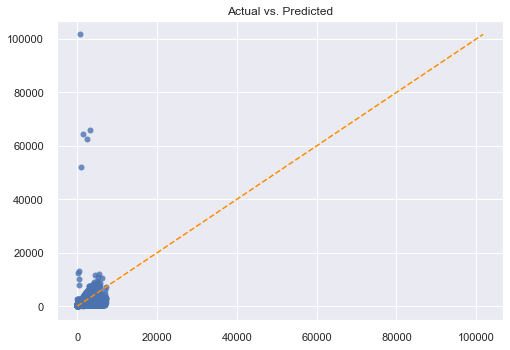

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with ride_duration_seconds


hour                   0.029397
new_passenger_count    0.015001
Name: ride_duration_seconds, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with ride_duration_seconds


distance_KM    0.725654
Name: ride_duration_seconds, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


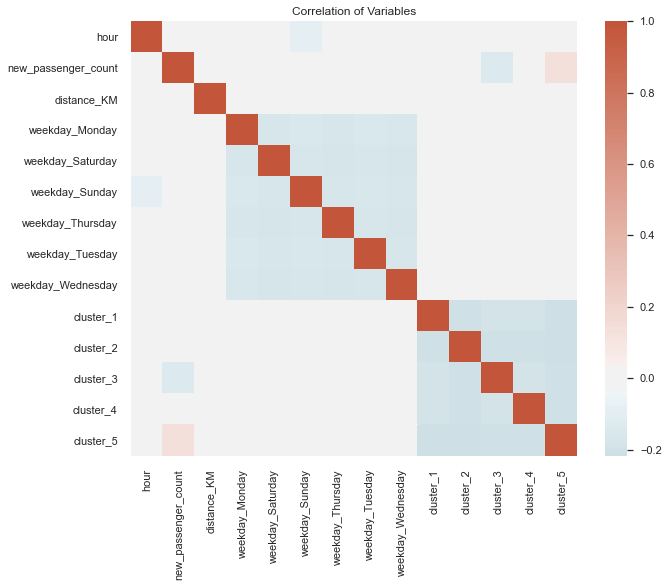

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
hour: 4.236660064125158
new_passenger_count: 2.4613358725494465
cluster_5: 1.8125259965710987
cluster_2: 1.737812135338389
cluster_1: 1.678002847263224
cluster_3: 1.6343538938837434
weekday_Saturday: 1.6304544177361822
cluster_4: 1.6300352468600414
weekday_Thursday: 1.6279144783438455
distance_KM: 1.6164369830311989
weekday_Tuesday: 1.6026214043274614
weekday_Wednesday: 1.6012508983741025
weekday_Monday: 1.558873553813291
weekday_Sunday: 1.5424700157652687

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------

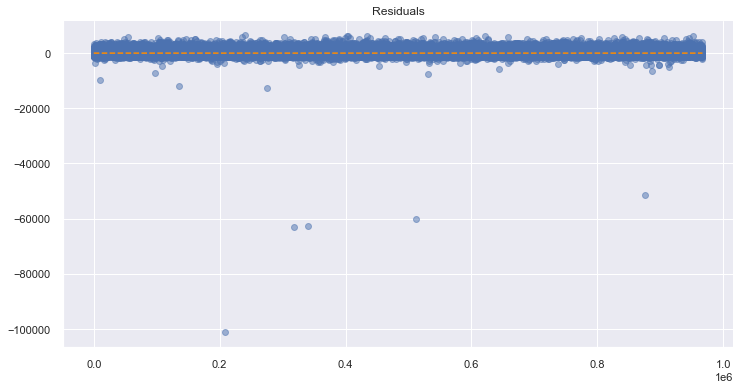

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 107063.04961808263,
 'pvalue for LM': 0.0,
 'F stats': 8599.382658037583,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


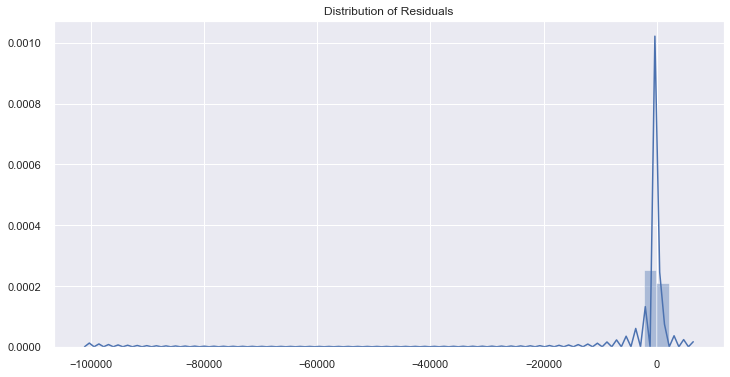


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


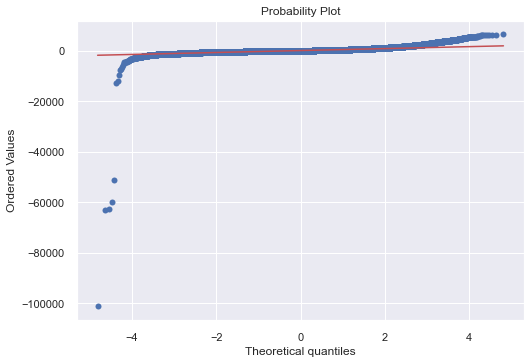


In your dataset you quite fat tails. You have 0.01 potential outliers (10055 rows)


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [166]:
tester.run_all()